In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [7]:
# Load the dataset
df = pd.read_csv('/Algerian_forest_fires_cleaned.csv')


In [8]:
# Display the first 5 rows of the DataFrame
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (243, 15)


In [10]:
# Missing values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
#Checking outliers
# Calculate the first (Q1) and third quartile (Q3)
# The first quartile (Q1) is the median of the first half of the data,
# and the third quartile (Q3) is the median of the second half.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Identifying outliers using IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Display identified rows containing potential outliers
print("Identified rows with potential outliers:")
print(df[outliers])

Identified rows with potential outliers:
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
14    15      6  2012           28  80  17   3.1  49.4   3.0   7.4  0.4   3.0   
15    16      6  2012           29  89  13   0.7  36.1   1.7   7.6  0.0   2.2   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
218    6      9  2012           34  71  14   6.5  64.5   3.3   9.1  1.0   3.5   
231   19      9  2012           29  41   8   0.1  83.9  24.9  86.0  2.7  28.9   
236   24      9  2012           26  49   6   2.0  61.3  11.9  28.1  0.6  11.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  

<ipython-input-12-e2939540eda0>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-12-e2939540eda0>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-12-e2939540eda0>:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


In [14]:
# Handling outliers
# Set the thresholds for detecting outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Filter out outliers from the DataFrame
cleaned_df = df[~((df < lower_threshold) | (df > upper_threshold)).any(axis=1)]

# Output the dimensions of the dataset after outlier removal
print("Dimensions of the dataset after removing outliers:", cleaned_df.shape)


Dimensions of the dataset after removing outliers: (177, 15)


<ipython-input-14-f7eb07df883f>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  cleaned_df = df[~((df < lower_threshold) | (df > upper_threshold)).any(axis=1)]


In [15]:
# Divide the cleaned dataset into independent variables (X) and the dependent variable (y)
# Here, 'Temperature', 'RH' (Relative Humidity), and 'Ws' (Wind speed) are selected as independent variables,
# which are the features we'll use to predict our target variable.
# The 'FWI' (Fire Weather Index) column is set as the dependent variable, which is what we aim to predict.
X = cleaned_df[['Temperature', 'RH', 'Ws']]
y = cleaned_df['FWI']

In [16]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# scaling
scaler = StandardScaler()

In [46]:
# Apply feature scaling to the training data and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

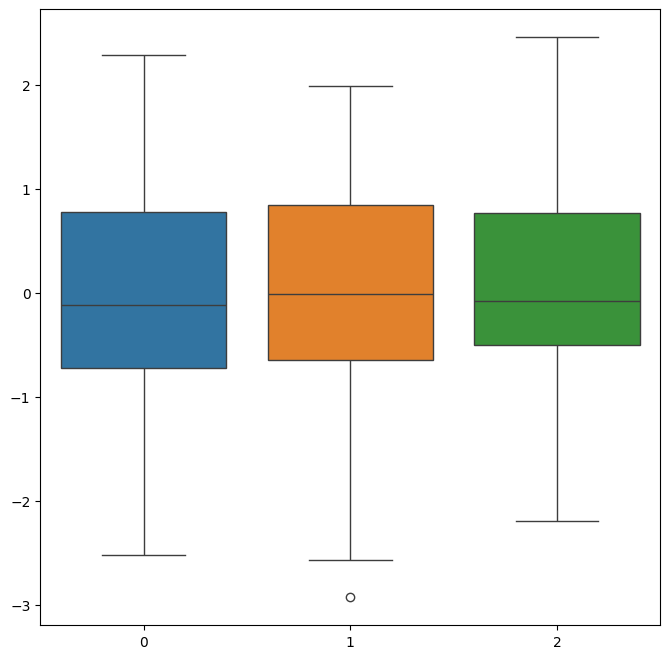

In [47]:
# Examining potential outliers in the training dataset using box plots for hyperparameter tuning
plt.figure(figsize=(8,8))
sns.boxplot(data=X_train_scaled)

In [48]:
# Linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)


LinearRegression()

In [49]:
# Accessing Model Coefficients and Intercept
lr.coef_, lr.intercept_

(array([ 2.49920587, -1.86021637,  1.45428071]), 6.732624113475179)

In [50]:
# Predicting the target values for the test dataset
y_pred = lr.predict(X_test_scaled)

In [51]:
# Calculating mean squared error (MSE), mean absolute error (MAE), or coefficient of determination (R-squared)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('r2:', r2)
print('mae:', mae)
print('mse:', mse)

r2: 0.4961491239498945
mae: 3.5126971785904093
mse: 17.03048229276758


In [53]:
# Pickle
# Pickle enables the storage of your trained models on the filesystem, facilitating their reuse without the necessity
# of retraining them each time they are needed. This saves computational resources and time.
import pickle

# Saving the linear regression model to a file
pickle.dump(lr, open('linear_regression_model.pkl', 'wb'))

# Saving the scaler object to a file for consistent data preprocessing
pickle.dump(scaler, open('feature_scaler.pkl', 'wb'))


In [54]:
#Generating a DataFrame with Novel Data for Model Prediction
unknown_data = {
    'Temperature': ['35', '37', '39', '41', '36.5', '38', '43'],
    'RH': [50, 55, 60, 68, 53, 58, 75],
    'Ws': [12, 15, 17, 19, 13.5, 14.5, 20]
}


In [55]:
# Creating a DataFrame from the unknown dataset
new_df = pd.DataFrame(unknown_data)



In [56]:
# Display
new_df

,Temperature,RH,Ws
0,35,50,12.0
1,37,55,15.0
2,39,60,17.0
3,41,68,19.0
4,36.5,53,13.5
5,38,58,14.5
6,43,75,20.0


In [57]:
# Loading the previously saved scaler object for data preprocessing
import pickle
scale_new_data = pickle.load(open('feature_scaler.pkl', 'rb'))


In [58]:
# Loading the trained linear regression model from a pickle file
lr_model_from_pickle = pickle.load(open('linear_regression_model.pkl', 'rb'))


In [59]:
# Scaling the new data using the loaded scaler object
new_df_sc = scale_new_data.transform(new_df)


In [60]:
new_df_sc

array([[ 0.78308047, -0.86112542, -1.34769829],
       [ 1.38479353, -0.50464073, -0.07804044],
       [ 1.98650658, -0.14815605,  0.76839813],
       [ 2.58821964,  0.42221945,  1.6148367 ],
       [ 1.23436526, -0.64723461, -0.71286936],
       [ 1.68565006, -0.29074992, -0.28965008],
       [ 3.1899327 ,  0.92129801,  2.03805599]])

In [61]:
# Making predictions on the scaled new data using the loaded linear regression model
y_pred_new_data = lr_model_from_pickle.predict(new_df_sc)


In [62]:
#Predicted values for unseen data
y_pred_new_data

array([ 8.3316514 , 11.01875648, 13.09038192, 14.76412417,  9.98484128,
       11.06503587, 15.95501451])